In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
DATA_DIR = '../data/clean/'

Connect to database to import data for the three test domains and demographic information:

In [3]:
foo = open("../api_token.txt")

In [4]:
from redcap import Project
api_url = 'https://redcap.vanderbilt.edu/api/'
api_key = open("../api_token.txt").read().strip()

lsl_dr_project = Project(api_url, api_key)

In [5]:
metadata = lsl_dr_project.export_metadata()

Import each database from REDCap:

In [6]:
articulation_fields = ['study_id','redcap_event_name', 'age_test_aaps','aaps_ss','age_test_gf2','gf2_ss', 
                       'gf3_siw_ss', 'gf3_sis_ss',' gf_version']
# articulation_fields = ['study_id','redcap_event_name', 'age_test_aaps','aaps_ss','age_test_gf2','gf2_ss']
articulation = lsl_dr_project.export_records(fields=articulation_fields, format='df', df_kwargs={'index_col':None,
                                                                                                'na_values':[999, 9999]})

In [7]:
articulation = articulation[~articulation.study_id.str.startswith('0000')]

In [8]:
records = lsl_dr_project.export_records(fields=articulation_fields)

In [9]:
expressive_fields = ['study_id','redcap_event_name','age_test_eowpvt','eowpvt_ss','age_test_evt',
                     'evt_ss','evt_version']
expressive = lsl_dr_project.export_records(fields=expressive_fields, format='df', 
                                           df_kwargs={'index_col':None,
                                                      'na_values':[999, 9999]})

In [10]:
expressive = expressive[~expressive.study_id.str.startswith('0000')]

In [11]:
receptive_fields = ['study_id','redcap_event_name','age_test_ppvt','ppvt_ss','ppvt_f','age_test_rowpvt','rowpvt_ss']
#receptive_fields = ['study_id','redcap_event_name','age_test_ppvt','ppvt_ss','age_test_rowpvt','rowpvt_ss']
receptive = lsl_dr_project.export_records(fields=receptive_fields, format='df', 
                                          df_kwargs={'index_col':None,
                                                     'na_values':[999, 9999]})

In [12]:
receptive = receptive[~receptive.study_id.str.startswith('0000')]

In [13]:
language_fields = ['study_id','redcap_event_name', 'test_sel3',
                    'age_test_pls','pls_ac_ss','pls_ec_ss','pls_choice','pls_tl_ss',
                    'age_test_owls','owls_lc_ss','owls_oe_ss','owls_oc_ss', 'owls_lcss',
                    'age_test_celp', 'celfp_cl_ssss', 'celfp_rl_ss','celfp_el_ss',
                    'age_test_celf', 'celf_cl', 'celf_rlss', 'celf_elss',
                    'age_test_celf4', 'celf4_cl_ss', 'celf4_rl_ss', 'celf4_el_ss',
                    'age_test_celf51', 'celf51_cl', 'celf51_rlss', 'celf51_elss',
                    'age_test_celf52', 'celf52_cl', 'celf_rliss', 'celf52_eliss',
                    'celfp_ss_ss', 'celfp_ws_ss', 'celfp_ev_ss', 'celfp_fd_ss',
                    'celfp_rs_ss', 'celfp_bc_ss', 'celfp_wcr_ss', 'celfp_wce_ss',
                    'celfp_wct_ss']

language_raw = lsl_dr_project.export_records(fields=language_fields, format='df', 
                                             df_kwargs={'index_col':None, 
                                                        'na_values':[999, 9999]})

In [14]:
language_raw = language_raw[~language_raw.study_id.str.startswith('0000')]

In [15]:
demographic_fields = ['study_id','redcap_event_name','redcap_data_access_group', 'demo_ses', 
                      'academic_year_rv','hl','gender','race', 'sib', 'prim_lang','mother_ed',
                      'father_ed','par1_ed','par2_ed', 'parent_hl', 'premature_age', 'onset_1',
                      'age_int','age','age_amp', 'time', 'disenroll_status', 'newborn_screen_comp', 
                      'newborn_screen_ad', 'newborn_screen_as', 'age_disenrolled', 'med_cause', 
                      'synd_cause', 'known_synd', 'etiology','etiology_2', 'etiology_3', 
                      'etiology_oth', 'degree_hl_ad', 
                      'type_hl_ad', 'tech_ad', 'degree_hl_as', 'ae','type_hl_as','tech_as', 
                      'age_ci', 'age_ci_2', 'age_aod_ad', 'age_aod_as', 'ci_man_ad', 'ci_man_as',
                      'ad_250', 'as_250', 'ad_500', 'as_500', 'ad_2000','as_2000','ad_4000',
                      'as_4000', 'hearing_changes', 'school_grade', 'optionserv_type','option_kind_i', 
                      'option_kind_g', 'option_assess_type', 'option_pop', 'otherserv', 'other_kind_i', 
                      'other_kind_g', 'other_pop', 'slc_fo', 'sle_fo', 'a_fo', 'funct_out_age', 
                      'fam_age', 'family_inv', 'school_lunch', 'medicaid', 'demo_ses', 'att_type', 
                      'att_days_hr', 'att_days_sch', 'att_days_st2_417','freq_slp', 'int_slp', 
                      'fam_part', 'freq_deafed', 'int_deafed', 'fam_deafed', 'demo_ses', 'school_lunch', 'medicaid']


demographic_raw = lsl_dr_project.export_records(fields=demographic_fields, format='df', 
                                                df_kwargs={'index_col':None, 
                                                           'low_memory':False,
                                                       'na_values':[888, 999, 9999]})

In [16]:
demographic_raw = demographic_raw[~demographic_raw.study_id.str.startswith('0000')]

## Attendance information

Several fields in the demographic data have missing values. We can fill missing values forward from previous observation (by `study_id`)

In [17]:
demographic = demographic_raw.sort_values(by='redcap_event_name').groupby('study_id').transform(
                                    lambda recs: recs.fillna(method='ffill'))#.reset_index()
demographic["study_id"] = demographic_raw.sort_values(by='redcap_event_name').study_id

Random check to make sure this worked

In [18]:
demographic[demographic.study_id=='1147-2010-0064']

,redcap_event_name,academic_year_rv,hl,gender,race,prim_lang,sib,mother_ed,father_ed,par1_ed,...,freq_deafed,int_deafed,fam_deafed,demo_ses,school_lunch,medicaid,newborn_screen_comp,newborn_screen_ad,newborn_screen_as,study_id
20744,initial_assessment_arm_1,2010.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147-2010-0064
20745,year_1_complete_71_arm_1,2011.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147-2010-0064
20746,year_2_complete_71_arm_1,2012.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147-2010-0064
20747,year_3_complete_71_arm_1,2013.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147-2010-0064


Demographic data without missing values:

In [19]:
demographic.head()

,redcap_event_name,academic_year_rv,hl,gender,race,prim_lang,sib,mother_ed,father_ed,par1_ed,...,freq_deafed,int_deafed,fam_deafed,demo_ses,school_lunch,medicaid,newborn_screen_comp,newborn_screen_ad,newborn_screen_as,study_id
0,initial_assessment_arm_1,2002.0,0.0,0.0,0.0,0.0,1.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0101-2002-0101
10815,initial_assessment_arm_1,2013.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0626-2013-0025
10817,initial_assessment_arm_1,2012.0,0.0,1.0,1.0,0.0,0.0,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0626-2013-0026
10821,initial_assessment_arm_1,2012.0,0.0,0.0,1.0,0.0,3.0,5.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0626-2013-0027
10825,initial_assessment_arm_1,2013.0,0.0,1.0,2.0,0.0,1.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0626-2013-0028


## Cleaning languge dataset

5 language measures:

- 3 versions of CELF
- PLS
    - pls_ac_rs: 	PLS: Auditory Comprehension Raw Score
    - pls_ac_ss: 	PLS: Auditory Comprehension Standard Score
    - pls_ec_rs: 	PLS: Expressive Communication Raw Score
    - pls_ec_ss: 	PLS: Expressive Communication Standard Score
    - pls_tl_rs: 	PLS: Total Language Score Standard Score Total
    - pls_tl_ss: 	PLS: Total Language Score Standard Score
- OWLS
    - age_test_owls: 	Age at time of testing (OWLS)
    - owls_lc_rs: 	OWLS: Listening Comprehension Raw Score
    - owls_lc_ss: 	OWLS: Listening Comprehension Standard Score
    - owls_oe_rs: 	OWLS: Oral Expression Raw Score
    - owls_oe_ss: 	OWLS: Oral Expression Standard Score
    - owls_oc_sss: 	OWLS: Oral Composite Sum of Listening Comprehension and Oral Expression Standard Scores
    - owls_oc_ss: 	OWLS: Oral Composite Standard Score
    - owls_wes_trs: 	OWLS: Written Expression Scale Total Raw Score
    - owls_wes_as: 	OWLS: Written Expression Scale Ability Score
    - owls_wes_ss: 	OWLS: Written Expression Scale Standard Score
    - owsl_lc: 	OWLS: Written Expression Scale Language Composite (Sum of written expression age-based standard score, listening comprehension standard score and oral expression standard score)
    - owls_lcss: 	OWLS: Language Composite Standard Score

In [20]:
language_raw.columns.str.contains('celp')

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [21]:
# Test type
language_raw["test_name"] = None
language_raw["test_type"] = None
language_raw["score"] = None
CELP = language_raw.age_test_celp.notnull()
CELF = language_raw.age_test_celf.notnull()
CELF4 = language_raw.age_test_celf4.notnull()
CELF51 = language_raw.age_test_celf51.notnull()
CELF52 = language_raw.age_test_celf52.notnull()
PLS = language_raw.age_test_pls.notnull()
OWLS = language_raw.age_test_owls.notnull()

language_raw['age_test'] = None
language_raw.loc[CELP, 'age_test'] = language_raw.age_test_celp
language_raw.loc[CELF, 'age_test'] = language_raw.age_test_celf
language_raw.loc[PLS, 'age_test'] = language_raw.age_test_pls
language_raw.loc[OWLS, 'age_test'] = language_raw.age_test_owls
language_raw.loc[CELF4, 'age_test'] = language_raw.age_test_celf4
language_raw.loc[CELF51, 'age_test'] = language_raw.age_test_celf51
language_raw.loc[CELF52, 'age_test'] = language_raw.age_test_celf52

language1 = language_raw[CELP | CELF | PLS | OWLS | CELF4 | CELF51 | CELF52].copy()
language2 = language1.copy()
language3 = language1.copy()

language1["test_type"] = "receptive"

language1.loc[CELP, "test_name"] = "CELF-P2"
language1.loc[CELF, "test_name"] = "CELF-4"
language1.loc[PLS, "test_name"] = "PLS"
language1.loc[OWLS, "test_name"] = "OWLS"
language1.loc[CELF4, "test_name"] = "CELF4"
language1.loc[CELF51, "test_name"] = "CELF51"
language1.loc[CELF52, "test_name"] = "CELF52"

language1.loc[CELP, "score"] = language1.celfp_rl_ss
language1.loc[CELF, "score"] = language1.celf_rlss
language1.loc[PLS, "score"] = language1.pls_ac_ss
language1.loc[OWLS, "score"] = language1.owls_lc_ss
language1.loc[CELF4, "score"] = language1.celf4_rl_ss
language1.loc[CELF51, "score"] = language1.celf51_rlss
language1.loc[CELF52, "score"] = language1.celf_rliss


language2["test_type"] = "expressive"

language2.loc[CELP, "test_name"] = "CELF-P2"
language2.loc[CELF, "test_name"] = "CELF-4"
language2.loc[PLS, "test_name"] = "PLS"
language2.loc[OWLS, "test_name"] = "OWLS"
language2.loc[CELF4, "test_name"] = "CELF4"
language2.loc[CELF51, "test_name"] = "CELF51"
language2.loc[CELF52, "test_name"] = "CELF52"

language2.loc[CELP, "score"] = language2.celfp_el_ss
language2.loc[CELF, "score"] = language2.celf_elss
language2.loc[PLS, "score"] = language2.pls_ec_ss
language2.loc[OWLS, "score"] = language2.owls_oe_ss
language2.loc[CELF4, "score"] = language2.celf4_el_ss
language2.loc[CELF51, "score"] = language2.celf51_elss
language2.loc[CELF52, "score"] = language2.celf52_eliss

language3["test_type"] = "total"

language3.loc[CELP, "test_name"] = "CELF-P2"
language3.loc[CELF, "test_name"] = "CELF-4"
language3.loc[PLS, "test_name"] = "PLS"
language3.loc[OWLS, "test_name"] = "OWLS"
language3.loc[CELF4, "test_name"] = "CELF4"
language3.loc[CELF51, "test_name"] = "CELF51"
language3.loc[CELF52, "test_name"] = "CELF52"

language3.loc[CELP, "score"] = language3.celfp_cl_ssss
language3.loc[CELF, "score"] = language3.celf_cl
language3.loc[PLS, "score"] = language3.pls_tl_ss
language3.loc[OWLS, "score"] = language3.owls_oc_ss
language3.loc[CELF4, "score"] = language3.celf4_cl_ss
language3.loc[CELF51, "score"] = language3.celf51_cl
language3.loc[CELF52, "score"] = language3.celf52_cl
# Average total OWLS scores
#language3.loc[OWLS, "score"] = language3[['owls_lcss', 'owls_oc_ss']].mean(1)

language = pd.concat([language1, language2, language3])
language = language[language.score.notnull()]
print(pd.crosstab(language.test_name, language.test_type))
print("There are {0} null values for score".format(sum(language["score"].isnull())))

test_type  expressive  receptive  total
test_name                              
CELF-4            747        618    813
CELF-P2          2375       2392   2472
CELF4             476        472    560
CELF51            796        788    790
CELF52            240        244    254
OWLS             1267       1273   1231
PLS              5360       5368   5340
There are 0 null values for score


A `school` variable was added, which is the first four columns of the `study_id`:

In [22]:
language["school"] = language.study_id.str.slice(0,4)

In [23]:
language_subtest = language[["study_id", "redcap_event_name", "score", "test_type", 
                             "test_name", "school", "age_test", 
                             'celfp_ss_ss', 'celfp_ws_ss', 
                             'celfp_ev_ss', 'celfp_fd_ss',
                             'celfp_rs_ss', 'celfp_bc_ss', 
                             'celfp_wcr_ss', 'celfp_wce_ss',
                             'celfp_wct_ss']]

In [24]:
language = language[["study_id", "redcap_event_name", "score", "test_type", "test_name", "school", "age_test"]]
language["domain"] = "Language"

In [25]:
language.to_csv(DATA_DIR+'language.csv')

## Cleaning articulation dataset

We converted the articulation dataset into a "long" format:

In [26]:
# Test type
articulation["test_type"] = None
ARIZ = articulation.aaps_ss.notnull()
GF = articulation.gf2_ss.notnull()
articulation = articulation[ARIZ | GF]
articulation.loc[(ARIZ & GF), "test_type"] = "Arizonia and Goldman"
articulation.loc[(ARIZ & ~GF), "test_type"] = "Arizonia"
articulation.loc[(~ARIZ & GF), "test_type"] = "Goldman"

print(articulation.test_type.value_counts())
print("There are {0} null values for test_type".format(sum(articulation["test_type"].isnull())))

# Test score (Arizonia if both)
articulation["score"] = articulation.aaps_ss
articulation.loc[(~ARIZ & GF), "score"] = articulation.gf2_ss[~ARIZ & GF]

Goldman                 6133
Arizonia                 631
Arizonia and Goldman      93
Name: test_type, dtype: int64
There are 0 null values for test_type


A `school` variable was added, which is the first four columns of the `study_id`:

In [27]:
articulation["school"] = articulation.study_id.str.slice(0,4)

The age was taken to be the Arizonia age if there are both test types:

In [28]:
articulation["age_test"] = articulation.age_test_aaps
articulation.loc[articulation.age_test.isnull(), 'age_test'] = articulation.age_test_gf2[articulation.age_test.isnull()]
print(articulation.age_test.describe())

count    6855.000000
mean       67.917433
std        29.586281
min        23.000000
25%        47.000000
50%        60.000000
75%        80.000000
max       243.000000
Name: age_test, dtype: float64


Finally, we dropped unwanted columns and added a domain identification column for merging:

In [29]:
articulation["domain"] = "Articulation"

In [30]:
articulation.to_csv(DATA_DIR+'articulation.csv')

## Cleaning demographic dataset

We excluded unwanted columns and rows for which age, gender or race were missing:

In [31]:
# Retain only subset of columns
demographic = demographic.rename(columns={'gender':'male'})

Due to sample size considerations, we reduced the non-English primary language variable to English (0) and non-English (1):

In [32]:
demographic["non_english"] = None
demographic.loc[demographic.prim_lang.notnull(), 'non_english'] = demographic.prim_lang[demographic.prim_lang.notnull()]>0
print(demographic.non_english.value_counts())
print("There are {0} null values for non_english".format(sum(demographic.non_english.isnull())))

False    17038
True      3926
Name: non_english, dtype: int64
There are 658 null values for non_english


Mother's education (`mother_ed`) and father's education (`father_ed`) were both recoded to: 

* 0=no high school diploma
* 1=high school
* 2=undergraduate
* 3=graduate

Category 6 (unknown) was recoded as missing.

In [33]:
demographic = demographic.rename(columns={"mother_ed":"_mother_ed"})
demographic["mother_ed"] = demographic._mother_ed.copy()
demographic.loc[demographic._mother_ed==1, 'mother_ed'] = 0
demographic.loc[(demographic._mother_ed==2) | (demographic.mother_ed==3), 'mother_ed'] = 1
demographic.loc[demographic._mother_ed==4, 'mother_ed'] = 2
demographic.loc[demographic._mother_ed==5, 'mother_ed'] = 3
demographic.loc[demographic._mother_ed==6, 'mother_ed'] = None
print("_mother_ed:")
print(demographic._mother_ed.value_counts())
print("mother_ed:")
print(demographic.mother_ed.value_counts())
print("\nThere are {0} null values for mother_ed".format(sum(demographic.mother_ed.isnull())))

_mother_ed:
6.0    5929
4.0    5020
3.0    3442
2.0    2727
5.0    2703
1.0     709
0.0     303
Name: _mother_ed, dtype: int64
mother_ed:
1.0    6169
2.0    5020
3.0    2703
0.0    1012
Name: mother_ed, dtype: int64

There are 6718 null values for mother_ed


In [34]:
demographic['mother_college'] = (demographic.mother_ed>=2).astype(int)

In [35]:
parent_hl_lookup = {0: "Both parents do not have a hearing loss",
        1: "Both parents have hearing loss",
        2: "Mother has hearing loss",
        3: "Father has hearing loss",
        4: "Unknown"}

In [36]:
demographic['parent_hearing_loss'] = demographic.parent_hl.replace(parent_hl_lookup)

In [37]:
demographic['one_or_both_parent_hl'] = demographic.parent_hl>0
demographic.loc[demographic.parent_hl.isnull(), 'one_or_both_parent_hl'] = np.nan
demographic.loc[demographic.parent_hl==4, 'one_or_both_parent_hl'] = np.nan

In [38]:
demographic['one_or_both_parent_hl'].isnull().mean()

0.21441124780316345

Autism

In [39]:
demographic.etiology_oth___1.value_counts()

0    21502
1      120
Name: etiology_oth___1, dtype: int64

Rename variable for convenience

In [40]:
demographic['autism'] = demographic.etiology_oth___1

Age of amplification

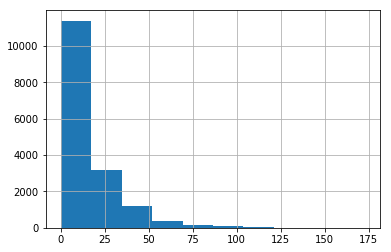

In [41]:
demographic.age_amp.hist()

Secondary diagnosis

In [42]:
demographic.shape

(21622, 172)

In [43]:
demographic['secondary_diagnosis'] = demographic.etiology==0
# Suspected or unknown treated as missing
demographic.loc[demographic.etiology > 1, 'secondary_diagnosis'] = None

In [44]:
demographic.secondary_diagnosis.value_counts()

0.0    16186
1.0     3423
Name: secondary_diagnosis, dtype: int64

In [45]:
demographic.secondary_diagnosis.mean()

0.17456270080065275

In [46]:
demographic.etiology_2.value_counts()

4.0    9311
0.0    4178
2.0    2139
1.0    1782
3.0    1311
Name: etiology_2, dtype: int64

In [47]:
demographic.etiology_2.isnull().sum()

2901

In [48]:
demographic.loc[demographic.etiology==3, 'etiology'] = None

Premature status was recoded to True (premature) and False (full-term). Here, premature indicates <36 weeks.

In [49]:
demographic['premature_weeks'] = demographic.premature_age.copy()
demographic.loc[demographic.premature_age==9, 'premature_weeks'] = None
demographic.premature_weeks = abs(demographic.premature_weeks-8)*2
print("There are {0} null values for premature_weeks".format(sum(demographic.premature_weeks.isnull())))

There are 3730 null values for premature_weeks


In [50]:
demographic[['premature_age', 'premature_weeks']].tail(10)

,premature_age,premature_weeks
284,8.0,0.0
6110,8.0,0.0
20176,9.0,NaN
20182,8.0,0.0
272,9.0,NaN
20188,8.0,0.0
15663,4.0,8.0
20193,9.0,NaN
20198,8.0,0.0
20292,8.0,0.0


In [51]:
demographic.premature_weeks.value_counts()

0.0     15467
2.0       901
4.0       539
12.0      264
6.0       253
10.0      226
8.0       182
14.0       54
16.0        6
Name: premature_weeks, dtype: int64

In [52]:
(demographic.premature_weeks>0).mean()

0.11215428729997225

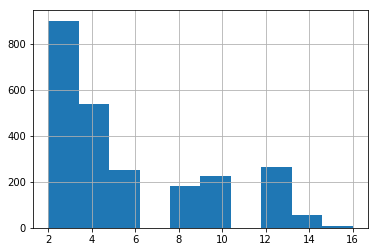

In [53]:
demographic.query('premature_weeks > 0').premature_weeks.hist()

Recode impant technology variables for each ear to one of four categories (None, Baha, Hearing aid, Cochlear implant):

In [54]:
categories_from_dummies = lambda dummies: dummies.idxmax(axis=1).str.split('___').apply(lambda x: int(x[1]))

In [55]:
tech_ad_dummies = demographic[demographic.columns[demographic.columns.str.startswith('tech_ad__')]]
demographic['tech_ad'] = categories_from_dummies(tech_ad_dummies)

In [56]:
tech_as_dummies = demographic[demographic.columns[demographic.columns.str.startswith('tech_as__')]]
demographic['tech_as'] = categories_from_dummies(tech_as_dummies)

In [57]:
tech_cats = ["None", "OAD", "Hearing aid", "Cochlear", "Other"]

demographic["tech_right"] = 4
demographic.loc[demographic.tech_ad==7, 'tech_right'] = 0
demographic.loc[demographic.tech_ad==3, 'tech_right'] = 1
demographic.loc[demographic.tech_ad.isin([1,2,4,5,10]), 'tech_right'] = 2
demographic.loc[demographic.tech_ad.isin([0,8,6]), 'tech_right'] = 3
demographic.loc[demographic.tech_ad.isnull(), 'tech_right'] = None

demographic["tech_left"] = 4
demographic.loc[demographic.tech_as==7, 'tech_left'] = 0
demographic.loc[demographic.tech_as==3, 'tech_left'] = 1
demographic.loc[demographic.tech_as.isin([1,2,4,5,10]), 'tech_left'] = 2
demographic.loc[demographic.tech_as.isin([0,8,6]), 'tech_left'] = 3
demographic.loc[demographic.tech_as.isnull(), 'tech_left'] = None

In [58]:
demographic.tech_left.value_counts()

3.0    13934
2.0     6002
0.0     1613
4.0       60
1.0       13
Name: tech_left, dtype: int64

In [59]:
demographic.tech_right.value_counts()

3.0    14191
2.0     5934
0.0     1423
4.0       57
1.0       17
Name: tech_right, dtype: int64

Substitute valid missing values for hearing loss:

In [60]:
demographic.loc[demographic.type_hl_ad==5, 'type_hl_ad'] = None
demographic.loc[demographic.type_hl_as==5, 'type_hl_ad'] = None

Create `degree_hl`, which is the maximum level of hearing loss in either ear:

In [61]:
demographic["degree_hl"] = np.maximum(demographic.degree_hl_ad, demographic.degree_hl_as)

/home/fonnesbeck_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in maximum
  """Entry point for launching an IPython kernel.


Create compound indicator variable for each technology (Baha, Hearing aid, Chochlear implant): 

* 0=none
* 1=one ear
* 2=both ears.

In [62]:
demographic["oad"] = 0
demographic.oad = demographic.oad.astype(object)
demographic.loc[(demographic.tech_right==1) | (demographic.tech_left==1), 'oad'] = 1
demographic.loc[(demographic.tech_right==1) & (demographic.tech_left==1), 'oad'] = 2
demographic.loc[(demographic.tech_right.isnull()) & (demographic.tech_left.isnull()), 'oad'] = None
print("oad:")
print(demographic.drop_duplicates(subset='study_id').oad.value_counts())
print("There are {0} null values for OAD".format(sum(demographic.oad.isnull())))

demographic["hearing_aid"] = 0
demographic.hearing_aid = demographic.hearing_aid.astype(object)
demographic.loc[(demographic.tech_right==2) | (demographic.tech_left==2), 'hearing_aid'] = 1
demographic.loc[(demographic.tech_right==2) & (demographic.tech_left==2), 'hearing_aid'] = 2
demographic.loc[(demographic.tech_right.isnull()) & (demographic.tech_right.isnull()), 'hearing_aid'] = None
print("\nhearing_aid:")
print(demographic.drop_duplicates(subset='study_id').hearing_aid.value_counts())
print("There are {0} null values for hearing_aid".format(sum(demographic.hearing_aid.isnull())))

demographic["cochlear"] = 0
demographic.cochlear = demographic.cochlear.astype(object)
demographic.loc[(demographic.tech_right==3) | (demographic.tech_left==3), 'cochlear'] = 1
demographic.loc[(demographic.tech_right==3) & (demographic.tech_left==3), 'cochlear'] = 2
demographic.loc[(demographic.tech_right.isnull()) & (demographic.tech_left.isnull()), 'cochlear'] = None
print("\ncochlear:")
print(demographic.drop_duplicates(subset='study_id').cochlear.value_counts())
print("There are {0} null values for cochlear".format(sum(demographic.cochlear.isnull())))
print(len(demographic))

oad:
0.0    8031
1.0       6
2.0       1
Name: oad, dtype: int64
There are 0 null values for OAD

hearing_aid:
0.0    3571
2.0    3227
1.0    1240
Name: hearing_aid, dtype: int64
There are 0 null values for hearing_aid

cochlear:
0.0    4672
2.0    2558
1.0     808
Name: cochlear, dtype: int64
There are 0 null values for cochlear
21622


Identify bilateral and bimodal individuals:

In [63]:
demographic["bilateral_ha"] = ((demographic.tech_ad==1) & (demographic.tech_as==1) |
                               (demographic.tech_ad==2) & (demographic.tech_as==1) |
                               (demographic.tech_ad==4) & (demographic.tech_as==1) |
                               (demographic.tech_ad==5) & (demographic.tech_as==1) |
                               (demographic.tech_ad==1) & (demographic.tech_as==2) |
                               (demographic.tech_ad==2) & (demographic.tech_as==2) |
                               (demographic.tech_ad==4) & (demographic.tech_as==2) |
                               (demographic.tech_ad==5) & (demographic.tech_as==2) |
                               (demographic.tech_ad==1) & (demographic.tech_as==4) |
                               (demographic.tech_ad==2) & (demographic.tech_as==4) |
                               (demographic.tech_ad==1) & (demographic.tech_as==5) |
                               (demographic.tech_ad==2) & (demographic.tech_as==5) |
                               (demographic.tech_ad==4) & (demographic.tech_as==4) |
                               (demographic.tech_ad==5) & (demographic.tech_as==4) |
                               (demographic.tech_ad==4) & (demographic.tech_as==5) |
                               (demographic.tech_ad==5) & (demographic.tech_as==5))

demographic["bilateral_ci"] = ((demographic.tech_ad==0) & (demographic.tech_as==0) |
                               (demographic.tech_ad==6) & (demographic.tech_as==0) |
                               (demographic.tech_ad==8) & (demographic.tech_as==0) |
                               (demographic.tech_ad==0) & (demographic.tech_as==6) |
                               (demographic.tech_ad==0) & (demographic.tech_as==8) |
                               (demographic.tech_ad==6) & (demographic.tech_as==6) |
                               (demographic.tech_ad==8) & (demographic.tech_as==6) |
                               (demographic.tech_ad==6) & (demographic.tech_as==8) |
                               (demographic.tech_ad==8) & (demographic.tech_as==8))

demographic["bimodal"] = ((demographic.tech_ad==0) & (demographic.tech_as==1) |
                               (demographic.tech_ad==0) & (demographic.tech_as==2) |
                               (demographic.tech_ad==0) & (demographic.tech_as==4) |
                               (demographic.tech_ad==0) & (demographic.tech_as==5) |
                               (demographic.tech_ad==1) & (demographic.tech_as==0) |
                               (demographic.tech_ad==1) & (demographic.tech_as==6) |
                               (demographic.tech_ad==1) & (demographic.tech_as==8) |
                               (demographic.tech_ad==2) & (demographic.tech_as==0) |
                               (demographic.tech_ad==2) & (demographic.tech_as==6) |
                               (demographic.tech_ad==2) & (demographic.tech_as==8) |
                               (demographic.tech_ad==4) & (demographic.tech_as==0) |
                               (demographic.tech_ad==4) & (demographic.tech_as==6) |
                               (demographic.tech_ad==4) & (demographic.tech_as==8) |
                               (demographic.tech_ad==5) & (demographic.tech_as==0) |
                               (demographic.tech_ad==5) & (demographic.tech_as==6) |
                               (demographic.tech_ad==5) & (demographic.tech_as==8) |
                               (demographic.tech_ad==6) & (demographic.tech_as==1) |
                               (demographic.tech_ad==6) & (demographic.tech_as==2) |
                               (demographic.tech_ad==6) & (demographic.tech_as==4) |
                               (demographic.tech_ad==6) & (demographic.tech_as==5) |
                               (demographic.tech_ad==8) & (demographic.tech_as==1) |
                               (demographic.tech_ad==8) & (demographic.tech_as==2) |
                               (demographic.tech_ad==8) & (demographic.tech_as==4) |
                               (demographic.tech_ad==8) & (demographic.tech_as==5))

demographic["bilateral_other"] = ((demographic.tech_ad==10) & (demographic.tech_as==0) |
                               (demographic.tech_ad==3) & (demographic.tech_as==0) |
                               (demographic.tech_ad==9) & (demographic.tech_as==0) |
                               (demographic.tech_ad==10) & (demographic.tech_as==1) |
                               (demographic.tech_ad==3) & (demographic.tech_as==1) |
                               (demographic.tech_ad==9) & (demographic.tech_as==1) |
                               (demographic.tech_ad==0) & (demographic.tech_as==10) |
                               (demographic.tech_ad==1) & (demographic.tech_as==10) |
                               (demographic.tech_ad==10) & (demographic.tech_as==10) |
                               (demographic.tech_ad==2) & (demographic.tech_as==10) |
                               (demographic.tech_ad==3) & (demographic.tech_as==10) |
                               (demographic.tech_ad==4) & (demographic.tech_as==10) |
                               (demographic.tech_ad==5) & (demographic.tech_as==10) |
                               (demographic.tech_ad==6) & (demographic.tech_as==10) |
                               (demographic.tech_ad==8) & (demographic.tech_as==10) |
                               (demographic.tech_ad==9) & (demographic.tech_as==10) |
                               (demographic.tech_ad==10) & (demographic.tech_as==2) |
                               (demographic.tech_ad==3) & (demographic.tech_as==2) |
                               (demographic.tech_ad==9) & (demographic.tech_as==2) |
                               (demographic.tech_ad==0) & (demographic.tech_as==3) |
                               (demographic.tech_ad==1) & (demographic.tech_as==3) |
                               (demographic.tech_ad==10) & (demographic.tech_as==3) |
                               (demographic.tech_ad==2) & (demographic.tech_as==3) |
                               (demographic.tech_ad==9) & (demographic.tech_as==3) |
                               (demographic.tech_ad==10) & (demographic.tech_as==4) |
                               (demographic.tech_ad==9) & (demographic.tech_as==4) |
                               (demographic.tech_ad==10) & (demographic.tech_as==5) |
                               (demographic.tech_ad==9) & (demographic.tech_as==5) |
                               (demographic.tech_ad==10) & (demographic.tech_as==6) |
                               (demographic.tech_ad==9) & (demographic.tech_as==6) |
                               (demographic.tech_ad==10) & (demographic.tech_as==8) |
                               (demographic.tech_ad==9) & (demographic.tech_as==8) |
                               (demographic.tech_ad==0) & (demographic.tech_as==9) |
                               (demographic.tech_ad==1) & (demographic.tech_as==9) |
                               (demographic.tech_ad==10) & (demographic.tech_as==9) |
                               (demographic.tech_ad==2) & (demographic.tech_as==9) |
                               (demographic.tech_ad==3) & (demographic.tech_as==9) |
                               (demographic.tech_ad==4) & (demographic.tech_as==9) |
                               (demographic.tech_ad==5) & (demographic.tech_as==9) |
                               (demographic.tech_ad==6) & (demographic.tech_as==9) |
                               (demographic.tech_ad==8) & (demographic.tech_as==9) |
                               (demographic.tech_ad==9) & (demographic.tech_as==9) |
                               (demographic.tech_ad==3) & (demographic.tech_as==3) |
                               (demographic.tech_ad==4) & (demographic.tech_as==3) |
                               (demographic.tech_ad==5) & (demographic.tech_as==3) |
                               (demographic.tech_ad==6) & (demographic.tech_as==3) |
                               (demographic.tech_ad==8) & (demographic.tech_as==3) |
                               (demographic.tech_ad==3) & (demographic.tech_as==4) |
                               (demographic.tech_ad==3) & (demographic.tech_as==5) |
                               (demographic.tech_ad==3) & (demographic.tech_as==6) |
                               (demographic.tech_ad==3) & (demographic.tech_as==8))

demographic["unilateral_ha"] = ((demographic.tech_ad==7) & (demographic.tech_as==1) |
                               (demographic.tech_ad==7) & (demographic.tech_as==2) |
                               (demographic.tech_ad==7) & (demographic.tech_as==4) |
                               (demographic.tech_ad==7) & (demographic.tech_as==5) |
                               (demographic.tech_ad==1) & (demographic.tech_as==7) |
                               (demographic.tech_ad==2) & (demographic.tech_as==7) |
                               (demographic.tech_ad==4) & (demographic.tech_as==7) |
                               (demographic.tech_ad==5) & (demographic.tech_as==7))

demographic["unilateral_ci"] = ((demographic.tech_ad==7) & (demographic.tech_as==0) |
                               (demographic.tech_ad==7) & (demographic.tech_as==6) |
                               (demographic.tech_ad==0) & (demographic.tech_as==7) |
                               (demographic.tech_ad==6) & (demographic.tech_as==7) |
                               (demographic.tech_ad==8) & (demographic.tech_as==7) |
                               (demographic.tech_ad==7) & (demographic.tech_as==8))

demographic["unilateral_other"] = ((demographic.tech_ad==7) & (demographic.tech_as==10) |
                               (demographic.tech_ad==7) & (demographic.tech_as==3) |
                               (demographic.tech_ad==10) & (demographic.tech_as==7) |
                               (demographic.tech_ad==3) & (demographic.tech_as==7) |
                               (demographic.tech_ad==9) & (demographic.tech_as==7) |
                               (demographic.tech_ad==7) & (demographic.tech_as==9))

In [64]:
demographic['bilateral_snhl'] = ((demographic.type_hl_ad==0) & (demographic.type_hl_as==0)).astype(int)
demographic['bilateral_ansd'] = ((demographic.type_hl_ad==3) & (demographic.type_hl_as==3)).astype(int)
demographic['bilateral_mixed'] = ((demographic.type_hl_ad==2) & (demographic.type_hl_as==2)).astype(int)
demographic['bilateral_cond'] = ((demographic.type_hl_ad==1) & (demographic.type_hl_as==1)).astype(int)
demographic['bilateral_normal'] = ((demographic.type_hl_ad==4) & (demographic.type_hl_as==4)).astype(int)
demographic['bilateral_unk'] = ((demographic.type_hl_ad==5) & (demographic.type_hl_as==5)).astype(int)

demographic['unilateral_snhl'] = (((demographic.type_hl_ad==0) & (demographic.type_hl_as==4)) |
                                  ((demographic.type_hl_ad==4) & (demographic.type_hl_as==0))).astype(int)
demographic['unilateral_ansd'] = (((demographic.type_hl_ad==3) & (demographic.type_hl_as==4)) |
                                  ((demographic.type_hl_ad==4) & (demographic.type_hl_as==3))).astype(int)
demographic['unilateral_mixed'] = (((demographic.type_hl_ad==2) & (demographic.type_hl_as==4)) |
                                  ((demographic.type_hl_ad==4) & (demographic.type_hl_as==2))).astype(int)
demographic['unilateral_cond'] = (((demographic.type_hl_ad==1) & (demographic.type_hl_as==4)) |
                                  ((demographic.type_hl_ad==4) & (demographic.type_hl_as==1))).astype(int)
demographic['unilateral_unk'] = (((demographic.type_hl_ad==5) & (demographic.type_hl_as==4)) |
                                  ((demographic.type_hl_ad==4) & (demographic.type_hl_as==5))).astype(int)

demographic['assymetrical'] = (((demographic.type_hl_ad==0) & (demographic.type_hl_as==1)) |
                              ((demographic.type_hl_ad==0) & (demographic.type_hl_as==2)) |
                              ((demographic.type_hl_ad==0) & (demographic.type_hl_as==3)) |
                              ((demographic.type_hl_ad==0) & (demographic.type_hl_as==5)) |
                              ((demographic.type_hl_ad==1) & (demographic.type_hl_as==0)) |
                              ((demographic.type_hl_ad==1) & (demographic.type_hl_as==2)) |
                              ((demographic.type_hl_ad==1) & (demographic.type_hl_as==3)) |
                              ((demographic.type_hl_ad==1) & (demographic.type_hl_as==5)) |
                              ((demographic.type_hl_ad==2) & (demographic.type_hl_as==0)) |
                              ((demographic.type_hl_ad==2) & (demographic.type_hl_as==1)) |
                              ((demographic.type_hl_ad==2) & (demographic.type_hl_as==3)) |
                              ((demographic.type_hl_ad==2) & (demographic.type_hl_as==5)) |
                              ((demographic.type_hl_ad==3) & (demographic.type_hl_as==0)) |
                              ((demographic.type_hl_ad==3) & (demographic.type_hl_as==1)) |
                              ((demographic.type_hl_ad==3) & (demographic.type_hl_as==2)) |
                              ((demographic.type_hl_ad==3) & (demographic.type_hl_as==5)) |
                              ((demographic.type_hl_ad==5) & (demographic.type_hl_as==0)) |
                              ((demographic.type_hl_ad==5) & (demographic.type_hl_as==1)) |
                              ((demographic.type_hl_ad==5) & (demographic.type_hl_as==2)) |
                              ((demographic.type_hl_ad==5) & (demographic.type_hl_as==3)))

Recode implant technology variables

In [65]:
tech_cats = ["None", "Baha", "Hearing aid", "Cochlear", "Other"]

demographic["tech_right"] = demographic.tech_ad.copy()
demographic.loc[demographic.tech_right==6, 'tech_right'] = 0
demographic.loc[demographic.tech_right==4, 'tech_right'] = 1
demographic.loc[demographic.tech_right==5, 'tech_right'] = 1
demographic.loc[demographic.tech_right==3, 'tech_right'] = 2
demographic.loc[demographic.tech_right==7, 'tech_right'] = 3
demographic.loc[demographic.tech_right==8, 'tech_right'] = 3
demographic.loc[demographic.tech_right==9, 'tech_right'] = 4
demographic.tech_right = np.abs(demographic.tech_right - 3)

demographic["tech_left"] = demographic.tech_as.copy()
demographic.loc[demographic.tech_left==6, 'tech_left'] = 0
demographic.loc[demographic.tech_left==4, 'tech_left'] = 1
demographic.loc[demographic.tech_left==5, 'tech_left'] = 1
demographic.loc[demographic.tech_left==3, 'tech_left'] = 2
demographic.loc[demographic.tech_left==7, 'tech_left'] = 3
demographic.loc[demographic.tech_left==8, 'tech_left'] = 3
demographic.loc[demographic.tech_left==9, 'tech_left'] = 4
demographic.tech_left = np.abs(demographic.tech_left - 3)

Create variable that identifies bilateral (0), bilateral HA left (1), bilateral HA right (2)

In [66]:
demographic['tech'] = 0
demographic.loc[(demographic.bimodal) & (demographic.tech_left==2), 'tech'] = 1
demographic.loc[(demographic.bimodal) & (demographic.tech_right==2), 'tech'] = 2
print("There are {0} null values for tech".format(sum(demographic.tech.isnull())))

There are 0 null values for tech


In [67]:
demographic["implant_category"] = None
demographic.loc[(demographic.cochlear==1) & (demographic.hearing_aid==0) & (demographic.oad==0), 
                'implant_category'] = 0
demographic.loc[(demographic.cochlear==0) & (demographic.hearing_aid==1) & (demographic.oad==0), 
                'implant_category'] = 1
demographic.loc[(demographic.cochlear==0) & (demographic.hearing_aid==0) & (demographic.oad==1), 
                'implant_category'] = 2
demographic.loc[(demographic.cochlear==2) & (demographic.hearing_aid==0) & (demographic.oad==0), 
                'implant_category'] = 3
demographic.loc[(demographic.cochlear==1) & (demographic.hearing_aid==1) & (demographic.oad==0), 
                'implant_category'] = 4
demographic.loc[(demographic.cochlear==1) & (demographic.hearing_aid==0) & (demographic.oad==1), 
                'implant_category'] = 5
demographic.loc[(demographic.cochlear==0) & (demographic.hearing_aid==2) & (demographic.oad==0), 
                'implant_category'] = 6
demographic.loc[(demographic.cochlear==0) & (demographic.hearing_aid==1) & (demographic.oad==1), 
                'implant_category'] = 7
demographic.loc[(demographic.cochlear==0) & (demographic.hearing_aid==0) & (demographic.oad==2), 
                'implant_category'] = 8
demographic.implant_category.value_counts()

3    13174
6     4880
4     1243
1      929
0      529
8        8
5        5
2        5
7        4
Name: implant_category, dtype: int64

## Hearing loss

In [71]:
# Bilateral not profound

# Normal (< 15 dB HL)
demographic['bilateral_hl_normal'] = (demographic.degree_hl_ad==0) & (demographic.degree_hl_as==0)

# Slight (15–25 dB HL)
demographic['bilateral_hl_slight'] = (demographic.degree_hl_ad==1) & (demographic.degree_hl_as==1)

# Mild (26–40 dB HL)
demographic['bilateral_hl_mild'] = (demographic.degree_hl_ad==2) & (demographic.degree_hl_as==2)

# Moderate (41–55 dB HL)
demographic['bilateral_hl_moderate'] = (demographic.degree_hl_ad==3) & (demographic.degree_hl_as==3)

# Moderately severe (56–70 dB HL)
demographic['bilateral_hl_modsev'] = (demographic.degree_hl_ad==4) & (demographic.degree_hl_as==4)

# Severe (71–90 dB HL)
demographic['bilateral_hl_severe'] = (demographic.degree_hl_ad==5) & (demographic.degree_hl_as==5)

# Bilateral profound

# Profound (> 90 dB HL)
demographic['bilateral_hl_profound'] = (demographic.degree_hl_ad==6) & (demographic.degree_hl_as==6)

# Unilateral not profound

# Slight (15–25 dB HL)
demographic['unilateral_hl_slight'] = ((demographic.degree_hl_ad==0) & (demographic.degree_hl_as==1) |
                                    (demographic.degree_hl_ad==1) & (demographic.degree_hl_as==0))

# Mild (26–40 dB HL)
demographic['unilateral_hl_mild'] = ((demographic.degree_hl_ad==0) & (demographic.degree_hl_as==2) |
                                    (demographic.degree_hl_ad==2) & (demographic.degree_hl_as==0))

# Moderate (41–55 dB HL)
demographic['unilateral_hl_moderate'] = ((demographic.degree_hl_ad==0) & (demographic.degree_hl_as==3) |
                                        (demographic.degree_hl_ad==3) & (demographic.degree_hl_as==0))

# Moderately severe (56–70 dB HL)
demographic['unilateral_hl_modsev'] = ((demographic.degree_hl_ad==0) & (demographic.degree_hl_as==4) |
                                        (demographic.degree_hl_ad==4) & (demographic.degree_hl_as==0))

# Severe (71–90 dB HL)
demographic['unilateral_hl_severe'] = ((demographic.degree_hl_ad==0) & (demographic.degree_hl_as==5) |
                                        (demographic.degree_hl_ad==5) & (demographic.degree_hl_as==0))

# Unilateral Profound

# Profound (> 90 dB HL)
demographic['unilateral_hl_profound'] = ((demographic.degree_hl_ad==0) & (demographic.degree_hl_as==6) |
                                        (demographic.degree_hl_ad==6) & (demographic.degree_hl_as==0))

 
# Asymmetrical (should be everything else except the missing data)
demographic['hl_assymmetrical'] = (((demographic.degree_hl_ad==1) & (demographic.degree_hl_as==2)) |
((demographic.degree_hl_ad==1) & (demographic.degree_hl_as==3)) |
((demographic.degree_hl_ad==1) & (demographic.degree_hl_as==4)) |
((demographic.degree_hl_ad==1) & (demographic.degree_hl_as==5)) |
((demographic.degree_hl_ad==1) & (demographic.degree_hl_as==6)) |
((demographic.degree_hl_ad==2) & (demographic.degree_hl_as==1)) |
((demographic.degree_hl_ad==2) & (demographic.degree_hl_as==3)) |
((demographic.degree_hl_ad==2) & (demographic.degree_hl_as==4)) |
((demographic.degree_hl_ad==2) & (demographic.degree_hl_as==5)) |
((demographic.degree_hl_ad==2) & (demographic.degree_hl_as==6)) |
((demographic.degree_hl_ad==3) & (demographic.degree_hl_as==1)) |
((demographic.degree_hl_ad==3) & (demographic.degree_hl_as==2)) |
((demographic.degree_hl_ad==3) & (demographic.degree_hl_as==4)) |
((demographic.degree_hl_ad==3) & (demographic.degree_hl_as==5)) |
((demographic.degree_hl_ad==3) & (demographic.degree_hl_as==6)) |
((demographic.degree_hl_ad==4) & (demographic.degree_hl_as==1)) |
((demographic.degree_hl_ad==4) & (demographic.degree_hl_as==2)) |
((demographic.degree_hl_ad==4) & (demographic.degree_hl_as==3)) |
((demographic.degree_hl_ad==4) & (demographic.degree_hl_as==5)) |
((demographic.degree_hl_ad==4) & (demographic.degree_hl_as==6)) |
((demographic.degree_hl_ad==5) & (demographic.degree_hl_as==1)) |
((demographic.degree_hl_ad==5) & (demographic.degree_hl_as==2)) |
((demographic.degree_hl_ad==5) & (demographic.degree_hl_as==3)) |
((demographic.degree_hl_ad==5) & (demographic.degree_hl_as==4)) |
((demographic.degree_hl_ad==5) & (demographic.degree_hl_as==6)) |
((demographic.degree_hl_ad==6) & (demographic.degree_hl_as==1)) |
((demographic.degree_hl_ad==6) & (demographic.degree_hl_as==2)) |
((demographic.degree_hl_ad==6) & (demographic.degree_hl_as==3)) |
((demographic.degree_hl_ad==6) & (demographic.degree_hl_as==5)) |
((demographic.degree_hl_ad==6) & (demographic.degree_hl_as==4)))

### Socioeconomic status

In [72]:
demographic.loc[demographic.school_lunch==3, 'school_lunch'] = np.nan
demographic.loc[demographic.medicaid==2, 'medicaid'] = np.nan
demographic.loc[demographic.demo_ses==5, 'demo_ses'] = np.nan


In [73]:
demographic['ses_cat'] = np.nan
demographic.loc[(demographic.demo_ses==0) & (demographic.school_lunch==0) & (demographic.medicaid==0), 'ses_cat'] = 0
demographic.loc[(demographic.demo_ses<3) & (demographic.school_lunch==1) & (demographic.medicaid==1), 'ses_cat'] = 0
demographic.loc[(demographic.demo_ses>2) & (demographic.school_lunch==1) & (demographic.medicaid==1), 'ses_cat'] = 0

**Age when hearing loss diagnosed** Data are entered inconsistently here, so we have to go in and replace non-numeric values.

In [74]:
demographic['age_diag'] = demographic.onset_1

Number of null values for `age_diag`

In [75]:
demographic.age_diag.isnull().sum()

4131

In [76]:
demographic['sex'] = demographic.male.replace({0:'Female', 1:'Male'})

Child has another diagnosed disability

In [77]:
demographic['known_synd'] = (demographic.synd_cause == 0)
# Unknown or suspected
demographic.loc[demographic.synd_cause > 1, 'known_synd'] = None

In [78]:
# If either known syndrome or secondary diagnosis
demographic['synd_or_disab'] = (demographic.secondary_diagnosis.fillna(0).astype(bool) 
                                | demographic.known_synd.fillna(0).astype(bool))

Missing sibling counts were properly encoded as `None` (missing).

In [79]:
demographic.loc[demographic.sib==4, 'sib'] = None

We reduced the number of race categories, pooling those that were neither caucasian, black, hispanic or asian to "other", due to small sample sizes for these categories. Category 7 (unknown) was recoded as missing.

In [80]:
races = ["Caucasian", "Black or African American", "Hispanic or Latino", "Asian", "Other"]
demographic = demographic.rename(columns={"race":"_race"})
demographic["race"] = demographic._race.copy()
demographic.loc[demographic.race==7, 'race'] = None
demographic.loc[demographic.race>3, 'race'] = 4
print("_race:")
print(demographic._race.value_counts())
print("race:")
print(demographic.race.value_counts())
print("There are {0} null values for race".format(sum(demographic.race.isnull())))
# Replace with recoded column

_race:
0.0    11010
2.0     3924
1.0     2012
3.0     1606
6.0     1160
8.0      705
7.0      377
4.0       87
5.0       70
Name: _race, dtype: int64
race:
0.0    11010
2.0     3924
4.0     2022
1.0     2012
3.0     1606
Name: race, dtype: int64
There are 1048 null values for race


In [81]:
demographic.to_csv(DATA_DIR+'demographics.csv')

## Cleaning expressive vocabulary dataset

We converted the expressive vocabulary dataset to "long" format:

In [82]:
# Test type
expressive["test_type"] = None
EOWPVT = expressive.eowpvt_ss.notnull()
EVT = expressive.evt_ss.notnull()
expressive = expressive[EOWPVT | EVT]
expressive.loc[EOWPVT & EVT, "test_type"] = "EOWPVT and EVT"
expressive.loc[EOWPVT & ~EVT, "test_type"] = "EOWPVT"
expressive.loc[~EOWPVT & EVT, "test_type"] = "EVT"
print("There are {0} null values for test_type".format(sum(expressive["test_type"].isnull())))

expressive["score"] = expressive.eowpvt_ss
expressive.loc[~EOWPVT & EVT, "score"] = expressive.evt_ss[~EOWPVT & EVT]

There are 0 null values for test_type


In [83]:
expressive.test_type.value_counts()

EVT               5253
EOWPVT            3871
EOWPVT and EVT     249
Name: test_type, dtype: int64

A `school` variable was added, which is the first four columns of the `study_id`:

In [84]:
expressive["school"] = expressive.study_id.str.slice(0,4)

The age was taken to be the EOWPVT age if there are both test types:

In [85]:
expressive["age_test"] = expressive.age_test_eowpvt
expressive.loc[expressive.age_test.isnull(), 'age_test'] = expressive.age_test_evt[expressive.age_test.isnull()]

Finally, we dropped unwanted columns and added a domain identification column for merging:

In [86]:
expressive["domain"] = "Expressive Vocabulary"

In [87]:
expressive.to_csv(DATA_DIR+'expressive_vocabulary.csv')

## Cleaning receptive vocabulary dataset

We converted the receptive vocabulary data table to "long" format:

In [88]:
# Test type
receptive["test_type"] = None
PPVT = receptive.ppvt_ss.notnull()
ROWPVT = receptive.rowpvt_ss.notnull()
receptive = receptive[PPVT | ROWPVT]
receptive.loc[PPVT & ROWPVT, "test_type"] = "PPVT and ROWPVT"
receptive.loc[PPVT & ~ROWPVT, "test_type"] = "PPVT"
receptive.loc[~PPVT & ROWPVT, "test_type"] = "ROWPVT"
print("There are {0} null values for test_type".format(sum(receptive["test_type"].isnull())))

receptive["score"] = receptive.ppvt_ss
receptive.loc[~PPVT & ROWPVT, "score"] = receptive.rowpvt_ss[~PPVT & ROWPVT]

There are 0 null values for test_type


A `school` variable was added, which is the first four columns of the `study_id`:

In [89]:
receptive["school"] = receptive.study_id.str.slice(0,4)

The age was taken to be the PPVT age if there are both test types:

In [90]:
receptive["age_test"] = receptive.age_test_ppvt
receptive.loc[receptive.age_test.isnull(), 'age_test'] = receptive.age_test_rowpvt[receptive.age_test.isnull()]

In [91]:
print("There are {0} null values for age_test".format(sum(receptive.age_test.isnull())))

There are 24 null values for age_test


Finally, we dropped unwanted columns and added a domain identification column for merging:

In [92]:
receptive["domain"] = "Receptive Vocabulary"

In [93]:
receptive.study_id.unique().shape

(4157,)

In [94]:
receptive.to_csv(DATA_DIR+'receptive_vocabulary.csv')

## Merge datasets

The four datasets were mereged into a single table. First, we concatenate the test scores data:

In [95]:
demographic.drop_duplicates('study_id').autism.sum()

85

In [96]:
test_scores = pd.concat([articulation, expressive, receptive, language])

/home/fonnesbeck_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Then we perform a merge between the demographic data and the test scores data:

In [97]:
lsl_dr = pd.merge(demographic, test_scores, on=["study_id", "redcap_event_name"], how='inner')

In [98]:
lsl_dr.tail()

,redcap_event_name,academic_year_rv,hl,male,_race,prim_lang,sib,_mother_ed,father_ed,par1_ed,...,gf3_sis_ss,gf3_siw_ss,gf_version,ppvt_f,ppvt_ss,rowpvt_ss,school,score,test_name,test_type
59726,year_9_complete_71_arm_1,2013.0,0.0,1.0,1.0,6.0,1.0,3.0,3.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,1147,102,NaN,Goldman
59727,year_9_complete_71_arm_1,2013.0,0.0,1.0,1.0,6.0,1.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1147,96,NaN,EVT
59728,year_9_complete_71_arm_1,2013.0,0.0,1.0,1.0,6.0,1.0,3.0,3.0,NaN,...,NaN,NaN,NaN,1.0,97.0,NaN,1147,97,NaN,PPVT
59729,year_9_complete_71_arm_1,2013.0,0.0,1.0,1.0,6.0,1.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1147,94,CELF4,total
59730,year_9_complete_71_arm_1,2014.0,0.0,0.0,0.0,0.0,2.0,5.0,4.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,0937,78,NaN,Goldman


Convert score to floating-point number

In [99]:
lsl_dr.score = lsl_dr.score.astype(float)

Remove some individuals who are no longer in the program

In [100]:
out_of_program = ('0836-2009-0008',
                    '0836-2010-0018',
                    '0836-2011-0016',
                    '0836-2011-0017',
                    '0836-2011-0019',
                    '0836-2012-0021',
                    '0836-2012-0024',
                    '1043-2010-0028',
                    '0519-2014-0075',
                    '0416-2005-5255',
                    '0416-2007-6094',
                    '0416-2012-8108',
                    '0208-2010-0025')

In [101]:
lsl_dr = lsl_dr[~lsl_dr.study_id.isin(out_of_program)]

Export dataset

In [102]:
lsl_dr.to_csv(DATA_DIR+'lsl_dr.csv')

In [103]:
lsl_dr.shape

(59537, 246)